<a href="https://colab.research.google.com/github/cmukonomuwi/DataScience/blob/main/K_Means_Clusteing_Unsupevised_Learning_Govind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# warnings

import warnings
warnings.filterwarnings('ignore')
from google.colab import files
uploaded = files.upload()

Saving customers.csv to customers.csv


In [9]:
Dataset1 = pd.read_csv("customers.csv")
Dataset1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
# shape
Dataset1.shape

(200, 5)

In [11]:
# Missing values

Dataset1.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


## We will take only Age and Spending Score columns

In [12]:
Dataset2 = Dataset1[['Age', 'Spending Score (1-100)']]
Dataset2.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


**Plots**

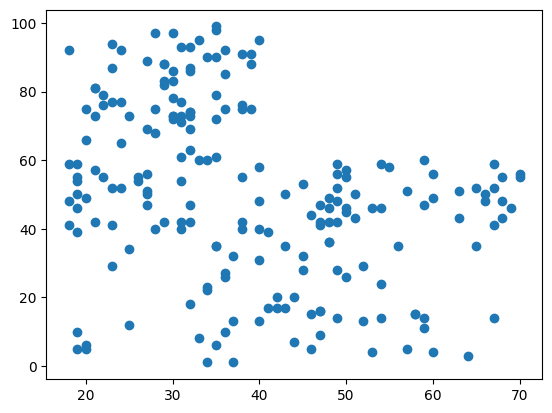

In [13]:
# using the matplotlib

plt.scatter(Dataset2['Age'], Dataset2['Spending Score (1-100)'])
plt.show()

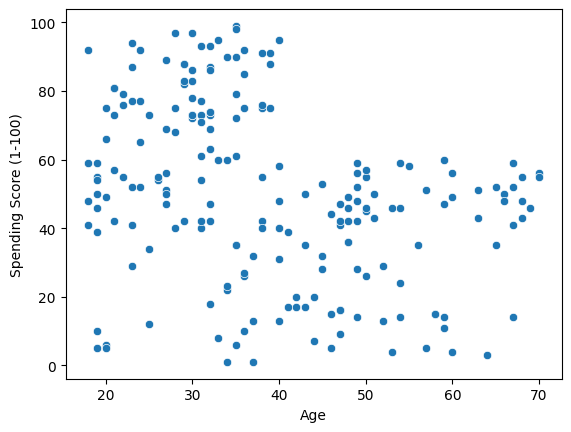

In [14]:
# using the seaborn

sns.scatterplot(x = Dataset2['Age'], y = Dataset2['Spending Score (1-100)'])
plt.show()

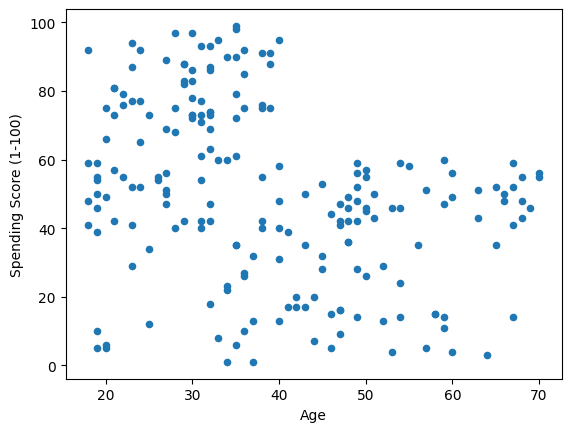

In [15]:
# using the DataFrame

Dataset2.plot.scatter(x = 'Age', y = 'Spending Score (1-100)')
plt.show()

### Find the Values of K - Elbow Curve

In [16]:
from sklearn.cluster import KMeans

In [17]:
Loss = []

for i in range(1, 11):
  Model1 = KMeans(n_clusters = i)
  Model1.fit(Dataset2)
  Loss.append(Model1.inertia_)

# This loop runs 10 times and each time model1 is computing the loss values in each iteration

In [18]:
Loss

[171535.50000000003,
 75949.15601023012,
 45844.53681626927,
 28165.583566629342,
 23810.462233071372,
 19788.73206654457,
 16270.304059017213,
 16231.334675962678,
 11562.064417577103,
 10967.316537839575]

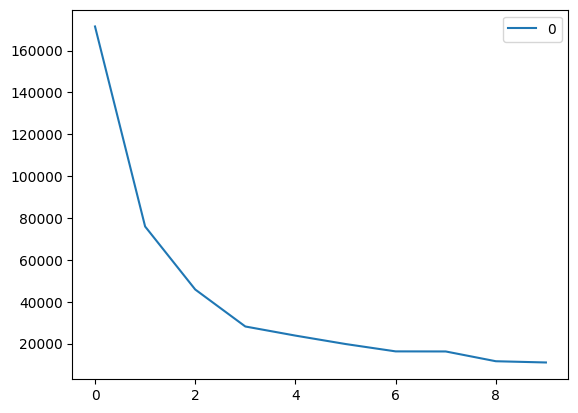

In [19]:
# Plotting

pd.DataFrame(Loss).plot()
plt.show()

Note -- Perfect Value of K is 3

In [20]:
Model2 = KMeans(n_clusters = 3)
Model2.fit(Dataset2)

KMeans(n_clusters=3)

In [21]:
# To see the clusters

cluster_label = Model2.labels_
cluster_label

array([2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0,
       1, 0, 1, 0, 2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 2,
       1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [22]:
Dataset2 = Dataset2.assign(cluster = cluster_label)
Dataset2.head(10)

,Age,Spending Score (1-100),cluster
0,19,39,2
1,21,81,0
2,20,6,1
3,23,77,0
4,31,40,2
5,22,76,0
6,35,6,1
7,23,94,0
8,64,3,1
9,30,72,0


**Visualizing the Clusters**

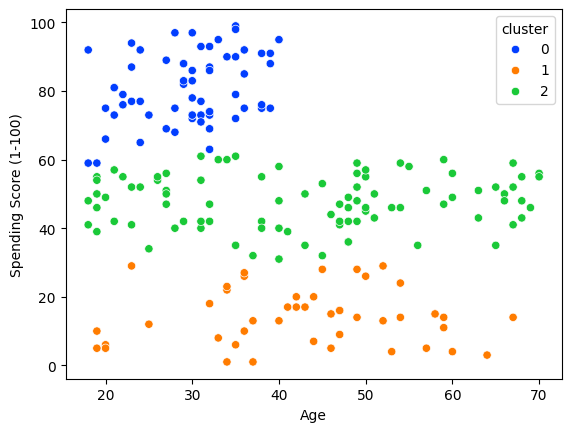

In [23]:
sns.scatterplot(x = Dataset2['Age'], y = Dataset2['Spending Score (1-100)'], hue = Dataset2['cluster'],
                palette = 'bright')
plt.show()

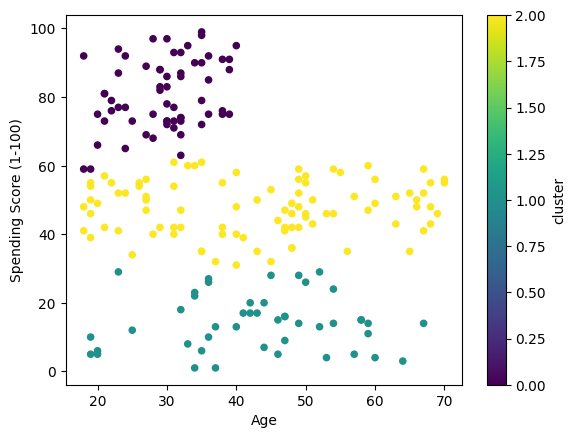

In [24]:
Dataset2.plot.scatter('Age', 'Spending Score (1-100)', c = 'cluster', colormap = 'viridis')
plt.show()